In [ ]:
# This notebook includes
# 1. Download landsat files using landsatxplore
# 2. Extract TIF from TAR
# 3. Clip TIF 
# 4. Convert DN values (trying to mimic focus geomatica, but not good, looking for other options)
# 5. Combine TIF (2D to 3D)
# 6. Plot image

In [ ]:
!pip install landsatxplore

     |████████████████████████████████| 81kB 3.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from landsatxplore.api import API
from landsatxplore.earthexplorer import EarthExplorer
import tarfile
import tifffile

In [ ]:
username = "xxx@xxx.com"             # your USGS username
password = "xxxxxxxx"                # your USGS password 

landsat_id = 'landsat_8_c1'          # check https://pypi.org/project/landsatxplore/ for different dataset IDs
lat = 44.886152
lng = -65.167591
start_date = '2018-01-01'
end_date = '2020-12-31'

In [ ]:
# Initialize a new API instance and get an access key
api = API(username, password)

# Search for Landsat TM scenes
scenes = api.search(
    dataset=landsat_id,  
    latitude=lat,
    longitude=lng,
    start_date=start_date,
    end_date=end_date,
    max_cloud_cover=10
)

# number of scenes found
print(f"{len(scenes)} scenes found.")

# List of avaliable scenes
for scene in scenes:
    print(f"acquisition_date = {scene['acquisition_date']}, landsat_product_id = {scene['landsat_product_id']}, landsat_scene_id= {scene['landsat_scene_id']}")

api.logout()

30 scenes found.
acquisition_date = 2020-10-16 00:00:00, landsat_product_id = LC08_L1TP_008029_20201016_20201104_01_T1, landsat_scene_id= LC80080292020290LGN00
acquisition_date = 2020-09-21 00:00:00, landsat_product_id = LC08_L1TP_009029_20200921_20201006_01_T1, landsat_scene_id= LC80090292020265LGN00
acquisition_date = 2020-09-05 00:00:00, landsat_product_id = LC08_L1TP_009029_20200905_20200917_01_T1, landsat_scene_id= LC80090292020249LGN00
acquisition_date = 2020-08-20 00:00:00, landsat_product_id = LC08_L1TP_009029_20200820_20200905_01_T1, landsat_scene_id= LC80090292020233LGN00
acquisition_date = 2020-07-28 00:00:00, landsat_product_id = LC08_L1TP_008029_20200728_20200807_01_T1, landsat_scene_id= LC80080292020210LGN00
acquisition_date = 2020-06-17 00:00:00, landsat_product_id = LC08_L1TP_009029_20200617_20200625_01_T1, landsat_scene_id= LC80090292020169LGN00
acquisition_date = 2020-05-25 00:00:00, landsat_product_id = LC08_L1TP_008029_20200525_20200608_01_T1, landsat_scene_id= LC80

In [ ]:
# select one of the landsat or just use the very first one 
# landsat_product_id = scenes[0]['landsat_product_id']
landsat_product_id = "LC08_L1TP_008029_20201016_20201104_01_T1"
data_dir = "./data/"

In [ ]:
# download landsat file (this may take a while)
ee = EarthExplorer(username, password)

# use the "landsat_product_id" from last step as the "identifier"
ee.download(identifier = landsat_product_id, output_dir = data_dir)

ee.logout()

757MB [05:21, 2.47MB/s]                           


In [ ]:
# check the landsat tar file in the directory
os.listdir(data_dir)

['LC08_L1TP_008029_20201016_20201104_01_T1.tar.gz']

In [ ]:
# extract TIF files from the tar file (change directory if needed)

tar_filename = data_dir + landsat_product_id + ".tar.gz"
tfile = tarfile.open(tar_filename, 'r:gz')
tfile.extractall(data_dir)

In [ ]:
# check if files are successfully extracted
os.listdir(data_dir)

['LC08_L1TP_008029_20201016_20201104_01_T1_B10.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B3.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B9.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B6.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_MTL.txt',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B2.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B4.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B5.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B7.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B11.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_ANG.txt',
 'LC08_L1TP_008029_20201016_20201104_01_T1.tar.gz',
 'LC08_L1TP_008029_20201016_20201104_01_T1_BQA.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B8.TIF',
 'LC08_L1TP_008029_20201016_20201104_01_T1_B1.TIF']

In [ ]:
# format TIF file names (blue, geen, red)
tif_filename_b2 = save_dir + landsat_product_id + "_B2.TIF"
tif_filename_b3 = save_dir + landsat_product_id + "_B3.TIF"
tif_filename_b4 = save_dir + landsat_product_id + "_B4.TIF"

# read TIF file (blue, green, red)
img_b2 = tifffile.imread(tif_filename_b2)
img_b3 = tifffile.imread(tif_filename_b3)
img_b4 = tifffile.imread(tif_filename_b4)

# print shape, min and max DN values
print(img_b2.shape, img_b2.min(), img_b2.max())
print(img_b3.shape, img_b3.min(), img_b3.max())
print(img_b4.shape, img_b4.min(), img_b4.max())

(7981, 7861) 0 28148
(7981, 7861) 0 28495
(7981, 7861) 0 30551


In [ ]:
 # clip a small part of the images
 img_b2a = img_b2[2000:2500,2000:2500].astype('float')
 img_b3a = img_b2[2000:2500,2000:2500].astype('float')
 img_b4a = img_b2[2000:2500,2000:2500].astype('float')

In [ ]:
 # convert DN values to 0-255 (no enhancement)
img_b2a_no_enhance = (img_b2a * 255 / (2**16 - 1)).astype('uint16')
img_b3a_no_enhance = (img_b3a * 255 / (2**16 - 1)).astype('uint16')
img_b4a_no_enhance = (img_b4a * 255 / (2**16 - 1)).astype('uint16')

# print shape, min and max DN values
print(img_b2a_no_enhance.shape, img_b2a_no_enhance.min(), img_b2a_no_enhance.max())
print(img_b3a_no_enhance.shape, img_b3a_no_enhance.min(), img_b3a_no_enhance.max())
print(img_b4a_no_enhance.shape, img_b4a_no_enhance.min(), img_b4a_no_enhance.max())

(500, 500) 28 70
(500, 500) 28 70
(500, 500) 28 70


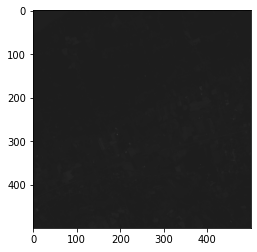

In [ ]:
# stack 3 bands (2D to 3D, red, green, blue)
img_no_enhance = np.stack([img_b4a_no_enhance, img_b3a_no_enhance, img_b2a_no_enhance], axis=2)

# display
plt.imshow(img_no_enhance)
plt.show()

In [ ]:
 # convert DN values to 0-255 (linear enhancement)
img_b2a_linear = ((img_b2a - img_b2a.min()) * 255 / (img_b2a.max() - img_b2a.min())).astype('uint16')
img_b3a_linear = ((img_b3a - img_b3a.min()) * 255 / (img_b3a.max() - img_b3a.min())).astype('uint16')
img_b4a_linear = ((img_b4a - img_b4a.min()) * 255 / (img_b4a.max() - img_b4a.min())).astype('uint16')

# print shape, min and max DN values
print(img_b2a_linear.shape, img_b2a_linear.min(), img_b2a_linear.max())
print(img_b3a_linear.shape, img_b3a_linear.min(), img_b3a_linear.max())
print(img_b4a_linear.shape, img_b4a_linear.min(), img_b4a_linear.max())

(500, 500) 0 255
(500, 500) 0 255
(500, 500) 0 255


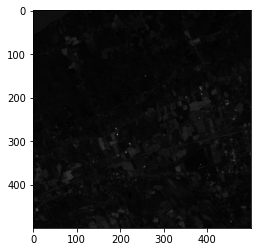

In [ ]:
# stack 3 bands (2D to 3D, red, green, blue)
img_linear = np.stack([img_b4a_linear, img_b3a_linear, img_b2a_linear], axis=2)

# display
plt.imshow(img_linear)
plt.show()

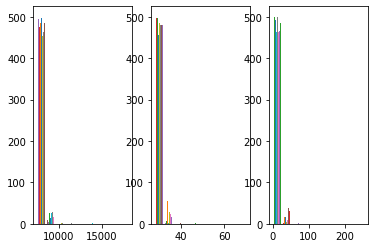

In [ ]:
figure, axs = plt.subplots(1,3)
axs[0].hist(img_b2a)
axs[1].hist(img_b2a_no_enhance)
axs[2].hist(img_b2a_linear)
plt.show()